In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
# Global variables
BNB_BLUE = '#007A87'
BNB_RED = '#FF5A5F'
BNB_DARK_GRAY = '#565A5C'
BNB_LIGHT_GRAY = '#CED1CC'

In [4]:
df=pd.read_csv('/Users/daminshah/Downloads/listings.csv')

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head

<bound method NDFrame.head of              id                            listing_url       scrape_id  \
0      16228948  https://www.airbnb.com/rooms/16228948  20170502172350   
1       8909380   https://www.airbnb.com/rooms/8909380  20170502172350   
2      14078522  https://www.airbnb.com/rooms/14078522  20170502172350   
3      13006928  https://www.airbnb.com/rooms/13006928  20170502172350   
4       7898757   https://www.airbnb.com/rooms/7898757  20170502172350   
5      11254337  https://www.airbnb.com/rooms/11254337  20170502172350   
6      16068508  https://www.airbnb.com/rooms/16068508  20170502172350   
7        654641    https://www.airbnb.com/rooms/654641  20170502172350   
8      14859779  https://www.airbnb.com/rooms/14859779  20170502172350   
9       4839375   https://www.airbnb.com/rooms/4839375  20170502172350   
10     14281484  https://www.airbnb.com/rooms/14281484  20170502172350   
11      8428885   https://www.airbnb.com/rooms/8428885  20170502172350   
12      

In [6]:
list(df.columns.values)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [7]:
print(df.shape)

(31253, 95)


In [8]:
df['neighbourhood'].value_counts()

Mid-Wilshire                 1909
Hollywood                    1850
Venice                       1653
West Hollywood                994
Long Beach                    787
Santa Monica                  772
Hollywood Hills               662
Silver Lake                   593
Echo Park                     564
Downtown                      520
Pasadena                      472
Westlake                      441
Mar Vista                     437
North Hollywood               411
Westwood                      392
South LA                      375
West Los Angeles              374
Sherman Oaks                  339
Mid-City                      314
Westchester/Playa Del Rey     313
Del Rey                       309
South Robertson               305
Marina Del Rey                300
Beverly Hills                 293
Malibu                        284
Los Feliz                     283
Glendale                      271
East Hollywood                253
Studio City                   242
Redondo Beach 

In [9]:
print(df.price)

0        $3,000.00
1           $50.00
2           $55.00
3          $150.00
4           $30.00
5           $35.00
6           $45.00
7           $56.00
8          $350.00
9           $80.00
10         $120.00
11          $55.00
12          $50.00
13          $60.00
14          $50.00
15          $55.00
16          $80.00
17          $79.00
18         $100.00
19          $75.00
20          $59.00
21         $123.00
22          $32.00
23          $59.00
24         $115.00
25          $45.00
26          $56.00
27          $59.00
28          $50.00
29          $70.00
           ...    
31223       $59.00
31224       $68.00
31225       $49.00
31226       $75.00
31227       $65.00
31228       $89.00
31229      $120.00
31230       $89.00
31231       $55.00
31232       $95.00
31233      $119.00
31234       $89.00
31235       $98.00
31236      $375.00
31237       $45.00
31238      $129.00
31239      $115.00
31240      $147.00
31241       $80.00
31242       $75.00
31243       $83.00
31244       

In [10]:
# Split into predictor and response
y = df[['price']]

In [11]:
# Append price at the end of the listings table
del df['price']
df = df.join(y)


In [12]:
print ('Number of entries: ', df.shape[0])

Number of entries:  31253


In [13]:
print ('Number of features: ', df.shape[1] - 1)

Number of features:  94


In [14]:
def plot_hist(n, titles, ranges):
    fig, ax = plt.subplots(n, figsize = (8, 7.5))
    for i in range(n):
        d, bins, patches = ax[i].hist(ranges[i], 50, normed = 1, color= BNB_RED, alpha = 0.85)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("Daily Listing Price in Dollars")
        ax[i].set_ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [15]:
#Visualize price table, changing them to floats and replacing the commas with a blank
prices = df['price'].apply(lambda s: float(s[1:].replace(',','')))

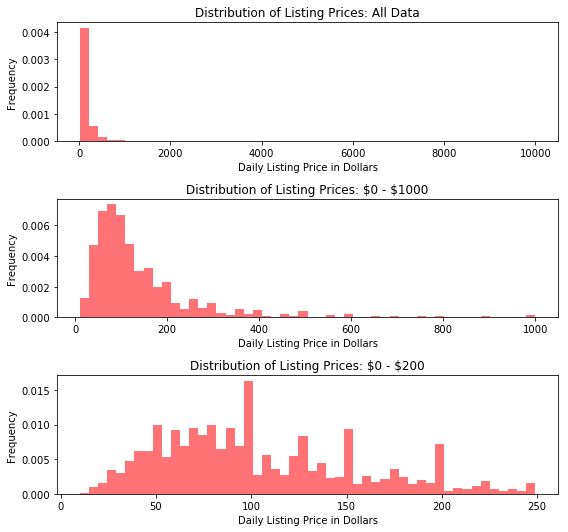

In [16]:
plot_hist(3, ['Distribution of Listing Prices: All Data', 'Distribution of Listing Prices: \$0 - \$1000', 
               'Distribution of Listing Prices: \$0 - \$200'], [prices, prices[prices <= 1000], prices[prices < 250]])

In [17]:
# Get frequency of bedroom number for listings
bedrooms_counts = Counter(df.bedrooms)
tdf = pd.DataFrame.from_dict(bedrooms_counts, orient = 'index').sort_values(by = 0)
tdf = (tdf.iloc[-10:, :] / 27392) * 100

In [18]:
# Sort bedroom dataframe by number
tdf.sort_index(axis = 0, ascending = True, inplace = True)

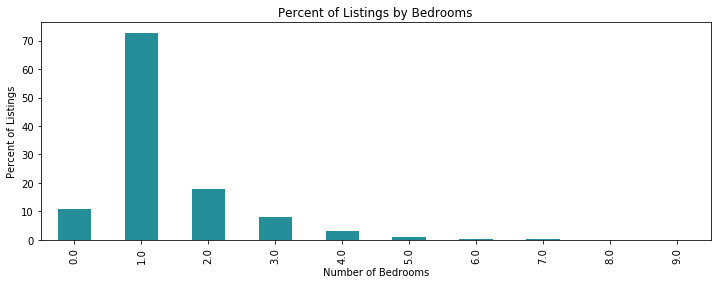

Percent of 1 Bedroom Listings: %72.78


In [19]:
# Plot percent of listings by bedroom number
ax = tdf.plot(kind = 'bar', figsize = (12, 4), color = BNB_BLUE, alpha = 0.85)
ax.set_xlabel("Number of Bedrooms")
ax.set_ylabel("Percent of Listings")
ax.set_title('Percent of Listings by Bedrooms')
ax.legend_.remove()

plt.show()

print ("Percent of 1 Bedroom Listings: %{0:.2f}".format(tdf[0][1]))

(40.45, 40.95)

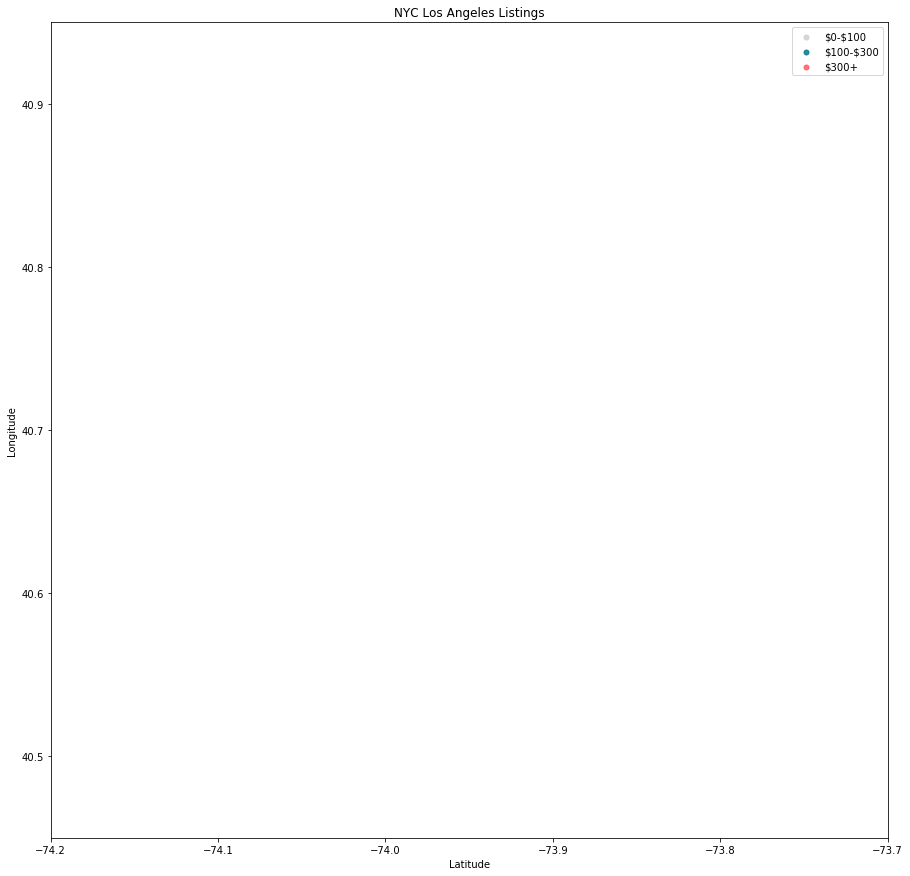

In [30]:
# # Outline price buckets
# intervals = [0,100,300, 10000]
# leg_labels = []

# # Get Labels for legend
# for i in range(0,len(intervals) - 1):
#     if i == len(intervals) - 2:
#         leg_labels.append('\${}+'.format(intervals[i]))
#     else:
#         leg_labels.append("\${}-\${}".format(intervals[i], intervals[i+1]))    

# buckets = []

# # Divide up into price buckets
# for i in range(0, len(intervals) - 1):
#     buckets.append(df[(prices > intervals[i]) & (prices < intervals[i+1])])

# colors = [BNB_LIGHT_GRAY, BNB_BLUE, BNB_RED]
# alphas = [0.85, 0.85, 0.85]  

# # Plot listings on scatterplot
# plt.figure(figsize=(15, 15))
# for i in range(0, len(buckets)):
#     plt.scatter(buckets[i]['longitude'], buckets[i]['latitude'], alpha = alphas[i], c=colors[i], s=25)
    
# plt.title('NYC Los Angeles Listings')
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
# plt.legend(labels=leg_labels, loc = 'best')
# plt.xlim(-74.2,-73.7)
# plt.ylim(40.45,40.95)

# # plt.show()

In [21]:
#PreProcessing
# Store number of entries and features
entries = df.shape[0]
features = df.shape[1]
print ('Number of features:', features)

Number of features: 95


In [22]:
bad_features = ['scrape_id', 'last_scraped', 'picture_url', 'host_picture_url', 
                'host_id', 'neighbourhood', 'state', 'market', 'country',
                'weekly_price', 'monthly_price', 'calendar_last_scraped',
                'host_name', 'host_since', 'street', 'calendar_updated',
                'first_review', 'last_review']

In [23]:
df.drop(bad_features, axis=1, inplace=True)
features = df.shape[1]




In [24]:
print ('Number of entries:', entries)
print ('Number of features:', features)
df.head(n=3)

Number of entries: 31253
Number of features: 77


,id,listing_url,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price
0,16228948,https://www.airbnb.com/rooms/16228948,Robert Ranch in Los Angeles for filming/wedding,Stunning Ranch Estate situated on 20 acres and...,NaN,Stunning Ranch Estate situated on 20 acres and...,none,NaN,NaN,NaN,...,f,NaN,NaN,t,strict,f,f,1,NaN,"$3,000.00"
1,8909380,https://www.airbnb.com/rooms/8909380,Nice quiet private ranch house,NaN,Very private and quite . Hiking horse riding a...,Very private and quite . Hiking horse riding a...,none,I'm in the country what's not to love about that,NaN,The train station is only one mile away,...,f,NaN,NaN,f,flexible,f,f,1,1.91,$50.00
2,14078522,https://www.airbnb.com/rooms/14078522,Room w/private bath on Small Ranch,My place is close to Six Flags Magic Mountain ...,Room with queen bed and private bath,My place is close to Six Flags Magic Mountain ...,none,Horse area. Trails for hiking and riding. Quie...,Overnight stalls for horses and arena availabl...,Just 4 miles from Metro commuter Train station,...,f,NaN,NaN,f,flexible,f,f,1,1.72,$55.00


In [25]:
def percent_empty(df):
    
    bools = df.isnull().tolist()
    percent_empty = float(bools.count(True)) / float(len(bools))
    
    return percent_empty, float(bools.count(True))

In [26]:
# Store emptiness for all features
emptiness = []

missing_columns = []

# Get emptiness for all features
for i in range(0, df.shape[1]):
    p, n = percent_empty(df.iloc[:,i])
    if n > 0:
        missing_columns.append(df.columns.values[i])
    emptiness.append(round((p), 2))
    
empty_dict = dict(zip(df.columns.values.tolist(), emptiness))


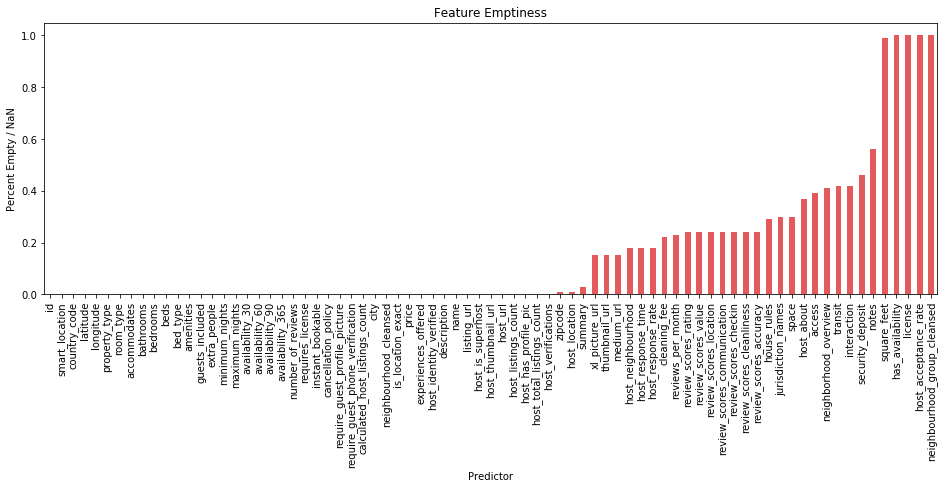

In [27]:
# Plot emptiness graph
empty = pd.DataFrame.from_dict(empty_dict, orient = 'index').sort_values(by=0)
ax = empty.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Predictor')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
ax.legend_.remove()

plt.show()

In [29]:
bad_features=['neighbourhood_group_cleansed','host_acceptance_rate','license','has_availability','square_feet']
df.drop(bad_features,axis=1,inplace=True)
#missing_columns.remove(bad_features)
features = df.shape[1]

ValueError: labels ['neighbourhood_group_cleansed' 'host_acceptance_rate' 'license'
 'has_availability' 'square_feet'] not contained in axis

In [ ]:
print ('Number of features:', features)

In [ ]:
# Convert to floats
y = y.apply(lambda s: float(s[1:].replace(',','')))
df['extra_people'] = df['extra_people'].apply(lambda s: float(s[1:].replace(',','')))